<a href="https://colab.research.google.com/github/RobelDawit/CS540/blob/main/CS540_HW3_Dawit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instaling Selenium

In [2]:
!pip install --quiet selenium==4.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [3]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.CebQCXAI1E/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.bUmJfeytT3/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.uDYVnazFxf/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [4]:
!apt-get update -q
!apt-get install chromium chromium-driver -q

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:7 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Hit:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:14 https://ppa.launchpa

In [5]:
from selenium import webdriver

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--incognito")
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920x1080")
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--blink-settings=imagesEnabled+false')
    #options.add_argument('--enable-javascript')
    options.add_argument('--blink-settings=imagesEnabled+false')
    driver = webdriver.Chrome(options=options)
    return driver



#Problem#

* Scrape the following horse properties website with your own scrapper on your selected state(s) (the number of states you choose should greater than or equal to 1), you can develop your scrapper either using Requests + BeautifulSoup or just Selenium.
https://www.horseproperties.net/browse-by-state

* You need to store the information of each property into a table

* In this table, each property takes one single line with multiple columns containing different attributes.

* Your scrapper should be able to fetch at least the following &
information:
  *  Property title, ACRES, Number of bedrooms, Number of bath room, Prices, Living area in SQ Feets, Property description, Property details, Location, website link to the detail page of this property.

* Store this table into a .csv file in which semicolon is used as delimiter.

In [15]:
driver = web_driver()
from selenium.webdriver.common.by import By
url = 'https://www.horseproperties.net/browse-by-state'
driver.get(url)

# from IPython.display import Image, display
# display(Image(driver.get_screenshot_as_png()))

html = driver.page_source

stateEntryContainer = driver.find_element(By.CLASS_NAME, "container.content")
statebuttons = stateEntryContainer.find_elements(By.TAG_NAME,"li")
statelinks = []

for item in statebuttons:

  stateURL = item.find_element(By.TAG_NAME,"a").get_attribute("href")
  statelinks.append(stateURL)


# driver.quit()
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()


['https://www.horseproperties.net/properties/alabama', 'https://www.horseproperties.net/properties/alaska', 'https://www.horseproperties.net/properties/arizona', 'https://www.horseproperties.net/properties/arkansas', 'https://www.horseproperties.net/properties/california', 'https://www.horseproperties.net/properties/colorado', 'https://www.horseproperties.net/properties/connecticut', 'https://www.horseproperties.net/properties/delaware', 'https://www.horseproperties.net/properties/district-of-columbia', 'https://www.horseproperties.net/properties/florida', 'https://www.horseproperties.net/properties/georgia', 'https://www.horseproperties.net/properties/hawaii', 'https://www.horseproperties.net/properties/idaho', 'https://www.horseproperties.net/properties/illinois', 'https://www.horseproperties.net/properties/indiana', 'https://www.horseproperties.net/properties/iowa', 'https://www.horseproperties.net/properties/kansas', 'https://www.horseproperties.net/properties/kentucky', 'https://w

Let's click the TFMSC link, but we first need to test if we are able to locate that...

In [ ]:
# copy its XPATH as //*[@id="content"]/table/tbody/tr[1]/td[1]/ul[1]/li[3]/b/a/font

LkXpath = """/html/body/div[4]/div/ul[1]/li[5]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))



Let's click()

In [ ]:
LkButton.click()
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
# driver.quit()
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's use the same method to click on the Airport button

image.png

In [ ]:
#/html/body/div[4]/center/table/tbody/tr/td/div/a[1]

LkXpath = """/html/body/div[4]/div/div[2]/div[3]/a[1]/div[2]/div[3]/div/h5"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's click the Dates

In [ ]:
# //*[@id="b_dSelector"]/a
LkXpath = """//*[@id="b_dSelector"]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's click on a date..

In [ ]:

LkXpath = """/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[3]/table/tbody/tr[2]/td/div[1]/div/center/div/table/tbody/tr[1]/td[1]/div/table/tbody/tr[2]/td[6]"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's click on the Airports tab...

In [ ]:
LkXpath = """//*[@id="b_locOpt"]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's locate the box and simulate keying in "MCO"

In [ ]:
LkXpath = """/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[1]/table/tbody/tr[1]/td/div[2]/input[1]"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.clear()
LkButton.send_keys("MCO")
display(Image(LkButton.screenshot_as_png))


and click the 'Go"

In [ ]:
LkXpath = """/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[1]/table/tbody/tr[1]/td/div[2]/input[2]"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's goto the Groupings Tab

In [ ]:
LkXpath = """//*[@id="b_groupSelector"]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's inspect the element in the left box to see if their XPATH have something in common..

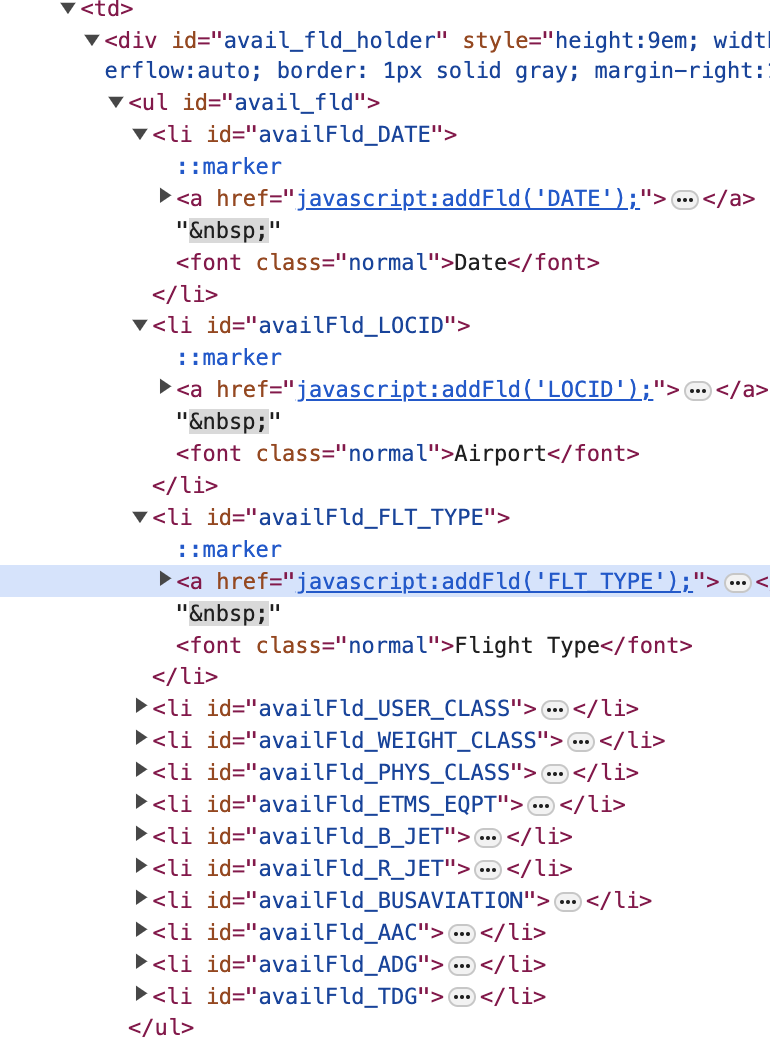

Let's try to add three of the items

In [ ]:
threeItemString = """/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[5]/table/tbody/tr[2]/td[1]/div/ul/li[1]/a
/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[5]/table/tbody/tr[2]/td[1]/div/ul/li[2]/a
/html/body/div[5]/center/table/tbody/tr/td/form/table/tbody/tr[2]/td[1]/div/div[5]/table/tbody/tr[2]/td[1]/div/ul/li[3]/a"""
threeItems = threeItemString.splitlines()
for itemXPath in threeItems:
  LkXpath = itemXPath
  LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
  LkButton = LkButtons[0]
  display(Image(LkButton.screenshot_as_png))
  LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Let's hit the Run button

In [ ]:
LkXpath = """//*[@id="b_Submit"]/a"""
LkButtons = driver.find_elements(by=By.XPATH, value=LkXpath)
LkButton = LkButtons[0]
display(Image(LkButton.screenshot_as_png))
LkButton.click()
# html = driver.page_source
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("thelastScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

Where is my report? is it in another window/tab, let's check how many tab(s) do I have right now.

In [ ]:
driver.window_handles

Let's switch to the second tab and see what is in there...

In [ ]:
driver.switch_to.window(driver.window_handles[-1])
display(Image(driver.get_screenshot_as_png()))

Let's save the HTML of the data tab and close the tab.

In [ ]:
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()
driver.close()

Let's check how many opening tabs do we have now...

In [ ]:
driver.window_handles

Let's switch back to the first tab..

In [ ]:
driver.switch_to.window(driver.window_handles[0])
display(Image(driver.get_screenshot_as_png()))
html = driver.page_source
file1 = open("theFirstScrape.html", "w")
file1.write(html)
file1.flush()
file1.close()

In [ ]:
driver.quit()

In [ ]:
file1 = open("finalresults.csv","w")
file1